In [ ]:
  import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('DISDATAV.csv')
df.head(10)

,MQ3,MQ2,MQ6,MQ5,MQ135,MQ4,MQ8,MQ9,HUM,TEMPC,TEMPF,TARGET
0,393,1859,1713,2063,1705,715,173,354,55.60\n%,28.7,83.66,0
1,388,1860,1691,2062,1706,720,240,357,55.60\n%,28.7,83.66,0
2,400,1861,1685,2059,1707,720,131,362,55.60\n%,28.7,83.66,0
3,398,1859,1693,2047,1709,720,171,357,55.70\n%,28.7,83.66,0
4,394,1847,1686,2064,1703,720,166,357,55.70\n%,28.7,83.66,0
5,381,1856,1690,2060,1702,703,169,355,55.60\n%,28.7,83.66,0
6,391,1841,1689,2057,1698,720,163,354,55.60\n%,28.7,83.66,0
7,391,1840,1686,2053,1691,717,163,360,55.50\n%,28.7,83.66,0
8,400,1837,1689,2045,1699,717,167,357,55.50\n%,28.7,83.66,0
9,304,1841,1671,2047,1702,719,170,343,55.40\n%,28.7,83.66,0


In [ ]:
df.isnull().sum()

MQ3       0
MQ2       0
MQ6       0
MQ5       0
MQ135     0
MQ4       0
MQ8       0
MQ9       0
HUM       2
TEMPC     2
TEMPF     2
TARGET    0
dtype: int64

In [ ]:
for col in df.columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
df.isnull().sum()

MQ3       0
MQ2       0
MQ6       0
MQ5       0
MQ135     0
MQ4       0
MQ8       0
MQ9       0
HUM       0
TEMPC     0
TEMPF     0
TARGET    0
dtype: int64

In [ ]:
from sklearn.utils import shuffle

In [ ]:
df = shuffle(df)
df.head()

,MQ3,MQ2,MQ6,MQ5,MQ135,MQ4,MQ8,MQ9,HUM,TEMPC,TEMPF,TARGET
10677,555,3578,1886,2091,781,594,1367,2374,56.1,28.9,84.02,6
9391,593,4095,2181,2313,592,475,1490,2726,52.4,29.0,84.20,5
4832,403,3594,1755,2191,1913,737,561,700,60.3,26.7,80.06,2
10772,521,3651,1892,2096,783,604,1385,2359,56.4,28.9,84.02,6
8022,816,4095,1776,2013,1983,807,542,389,60.7,25.8,78.44,4


In [ ]:
X = df.drop(['TARGET'], axis = 1)
X = np.array(X)
Y = np.array(df['TARGET'])
X[:10], Y[:10]

(array([[ 555.  , 3578.  , 1886.  , 2091.  ,  781.  ,  594.  , 1367.  ,
         2374.  ,   56.1 ,   28.9 ,   84.02],
        [ 593.  , 4095.  , 2181.  , 2313.  ,  592.  ,  475.  , 1490.  ,
         2726.  ,   52.4 ,   29.  ,   84.2 ],
        [ 403.  , 3594.  , 1755.  , 2191.  , 1913.  ,  737.  ,  561.  ,
          700.  ,   60.3 ,   26.7 ,   80.06],
        [ 521.  , 3651.  , 1892.  , 2096.  ,  783.  ,  604.  , 1385.  ,
         2359.  ,   56.4 ,   28.9 ,   84.02],
        [ 816.  , 4095.  , 1776.  , 2013.  , 1983.  ,  807.  ,  542.  ,
          389.  ,   60.7 ,   25.8 ,   78.44],
        [ 724.  , 3549.  , 1729.  , 2087.  , 1995.  ,  801.  ,  529.  ,
          406.  ,   53.7 ,   26.9 ,   80.42],
        [ 432.  , 2998.  , 1936.  , 2210.  ,  546.  ,  388.  , 1189.  ,
         2501.  ,   54.5 ,   28.5 ,   83.3 ],
        [ 317.  , 2113.  , 1735.  , 2187.  , 1885.  ,  807.  ,  306.  ,
          401.  ,   54.9 ,   28.2 ,   82.76],
        [ 977.  , 3219.  , 2140.  , 2168.  , 1266.  , 17

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [ ]:
l_encode = LabelEncoder()
l_encode.fit(Y)
Y = l_encode.transform(Y)
Y = to_categorical(Y)
Y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
Y.shape

(12650, 8)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-0.18906609,  0.61890628,  0.06308138, ..., -0.55593243,
         0.70998961,  0.70998961],
       [-0.04219889,  1.18696724,  1.7531212 , ..., -0.91867915,
         0.77256721,  0.77256721],
       [-0.77653491,  0.6364865 , -0.68741087, ..., -0.14416588,
        -0.66671765, -0.66671765],
       ...,
       [-1.11664844, -1.60938699, -0.92802671, ..., -0.80103157,
         1.21061043,  1.21061043],
       [-0.90407748, -1.34458488, -1.01968989, ..., -0.65397209,
         0.77256721,  0.77256721],
       [-1.28284027, -1.29074545, -0.83636354, ..., -0.71279588,
         0.3971016 ,  0.3971016 ]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(scaled_X,Y, test_size = 0.3, random_state = 1)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((8855, 11), (8855, 8), (3795, 11), (3795, 8))

In [ ]:
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import GRU
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(GRU(100, input_shape=(train_x.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(train_y.shape[1], activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100)               30900     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 808       
Total params: 31,708
Trainable params: 31,708
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)
history = model.fit(train_x, train_y, epochs = 50, batch_size = 32, callbacks = [callback], validation_data=(test_x, test_y))


Epoch 1/50
277/277 [==============================] - 2s 8ms/step - loss: 0.5322 - accuracy: 0.8253 - val_loss: 0.0480 - val_accuracy: 0.9918
Epoch 2/50
277/277 [==============================] - 2s 6ms/step - loss: 0.0291 - accuracy: 0.9955 - val_loss: 0.0119 - val_accuracy: 0.9989
Epoch 3/50
277/277 [==============================] - 2s 6ms/step - loss: 0.0173 - accuracy: 0.9960 - val_loss: 0.0041 - val_accuracy: 0.9995
Epoch 4/50
277/277 [==============================] - 2s 6ms/step - loss: 0.0092 - accuracy: 0.9976 - val_loss: 0.0023 - val_accuracy: 0.9995
Epoch 5/50
277/277 [==============================] - 2s 6ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0155 - val_accuracy: 0.9942
Epoch 6/50
277/277 [==============================] - 2s 6ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0071 - val_accuracy: 0.9989
Epoch 7/50
277/277 [==============================] - 2s 6ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 8.7067e-04 - val_accuracy: 1.0000
Ep

In [ ]:
model.save("gru")
# history = np.load('ann.npy', allow_pickle=True).item()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: gru/assets


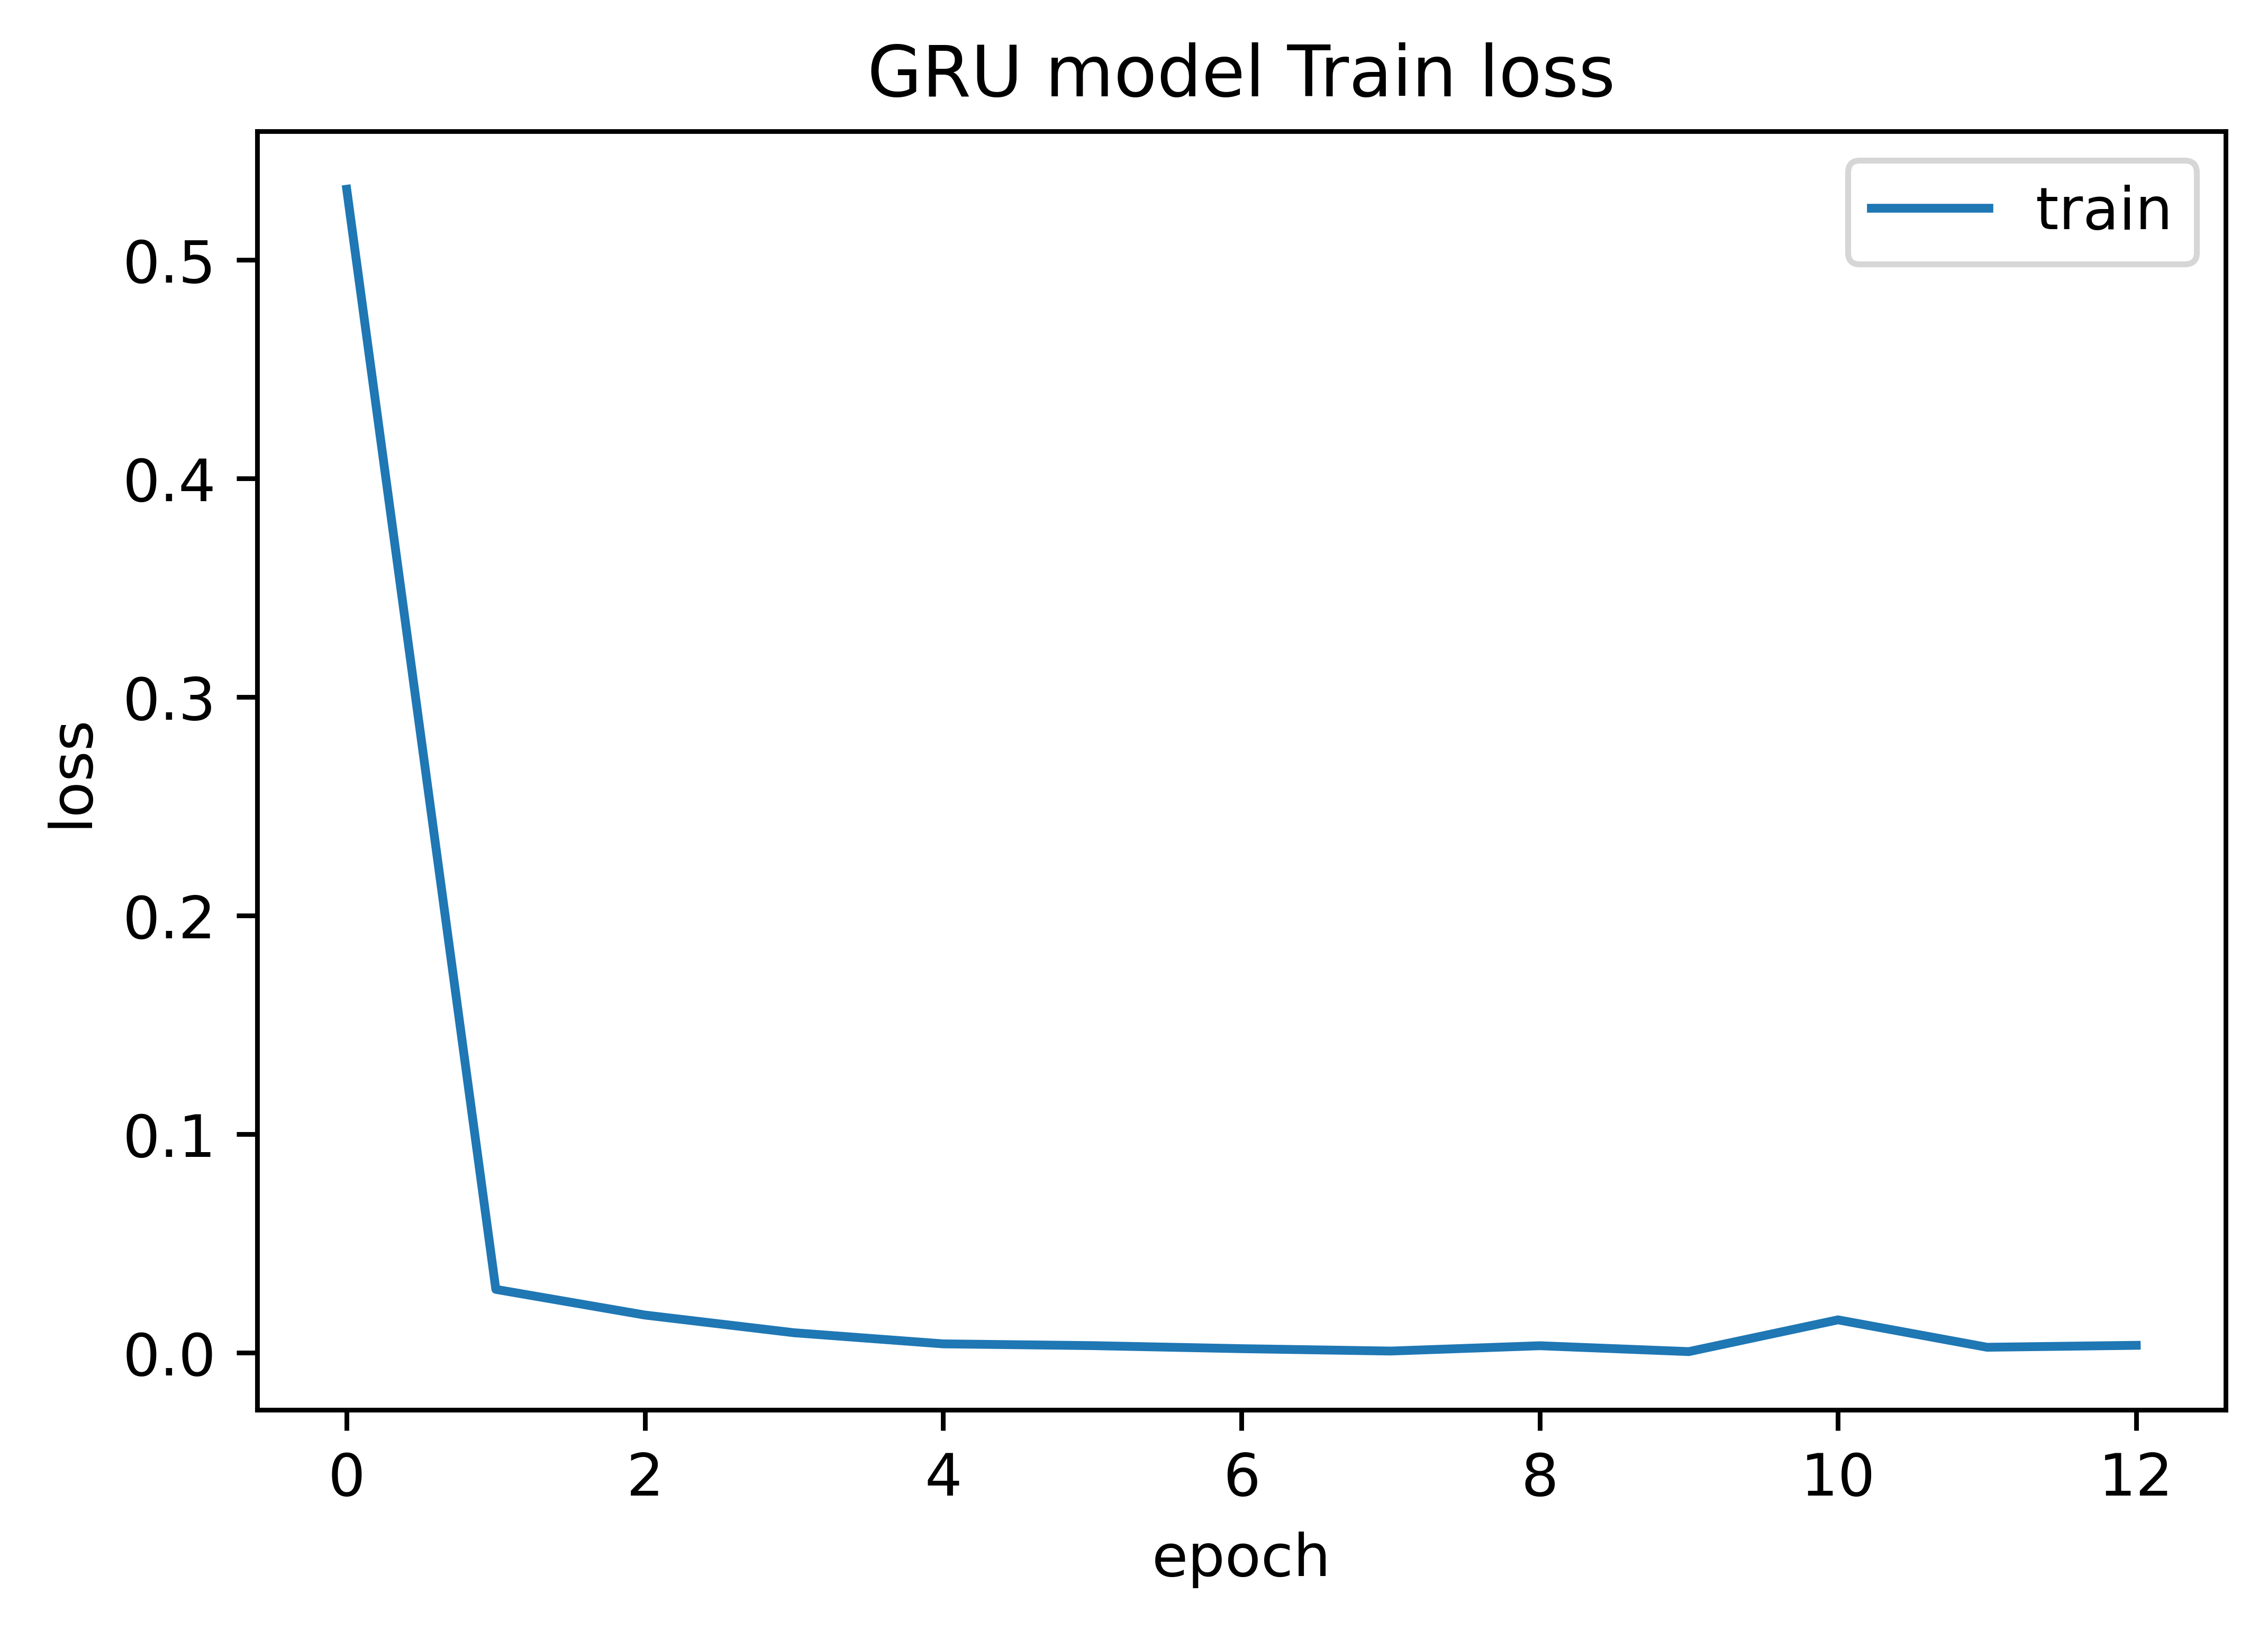

In [ ]:
plt.rcParams['figure.dpi'] = 800
plt.plot(history.history['loss'])
plt.title('GRU model Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.savefig("GRU_model_train_loss.pdf", format="pdf", bbox_inches="tight")
plt.show()

# include Test loss in graph
# check for exclusive another for test loss

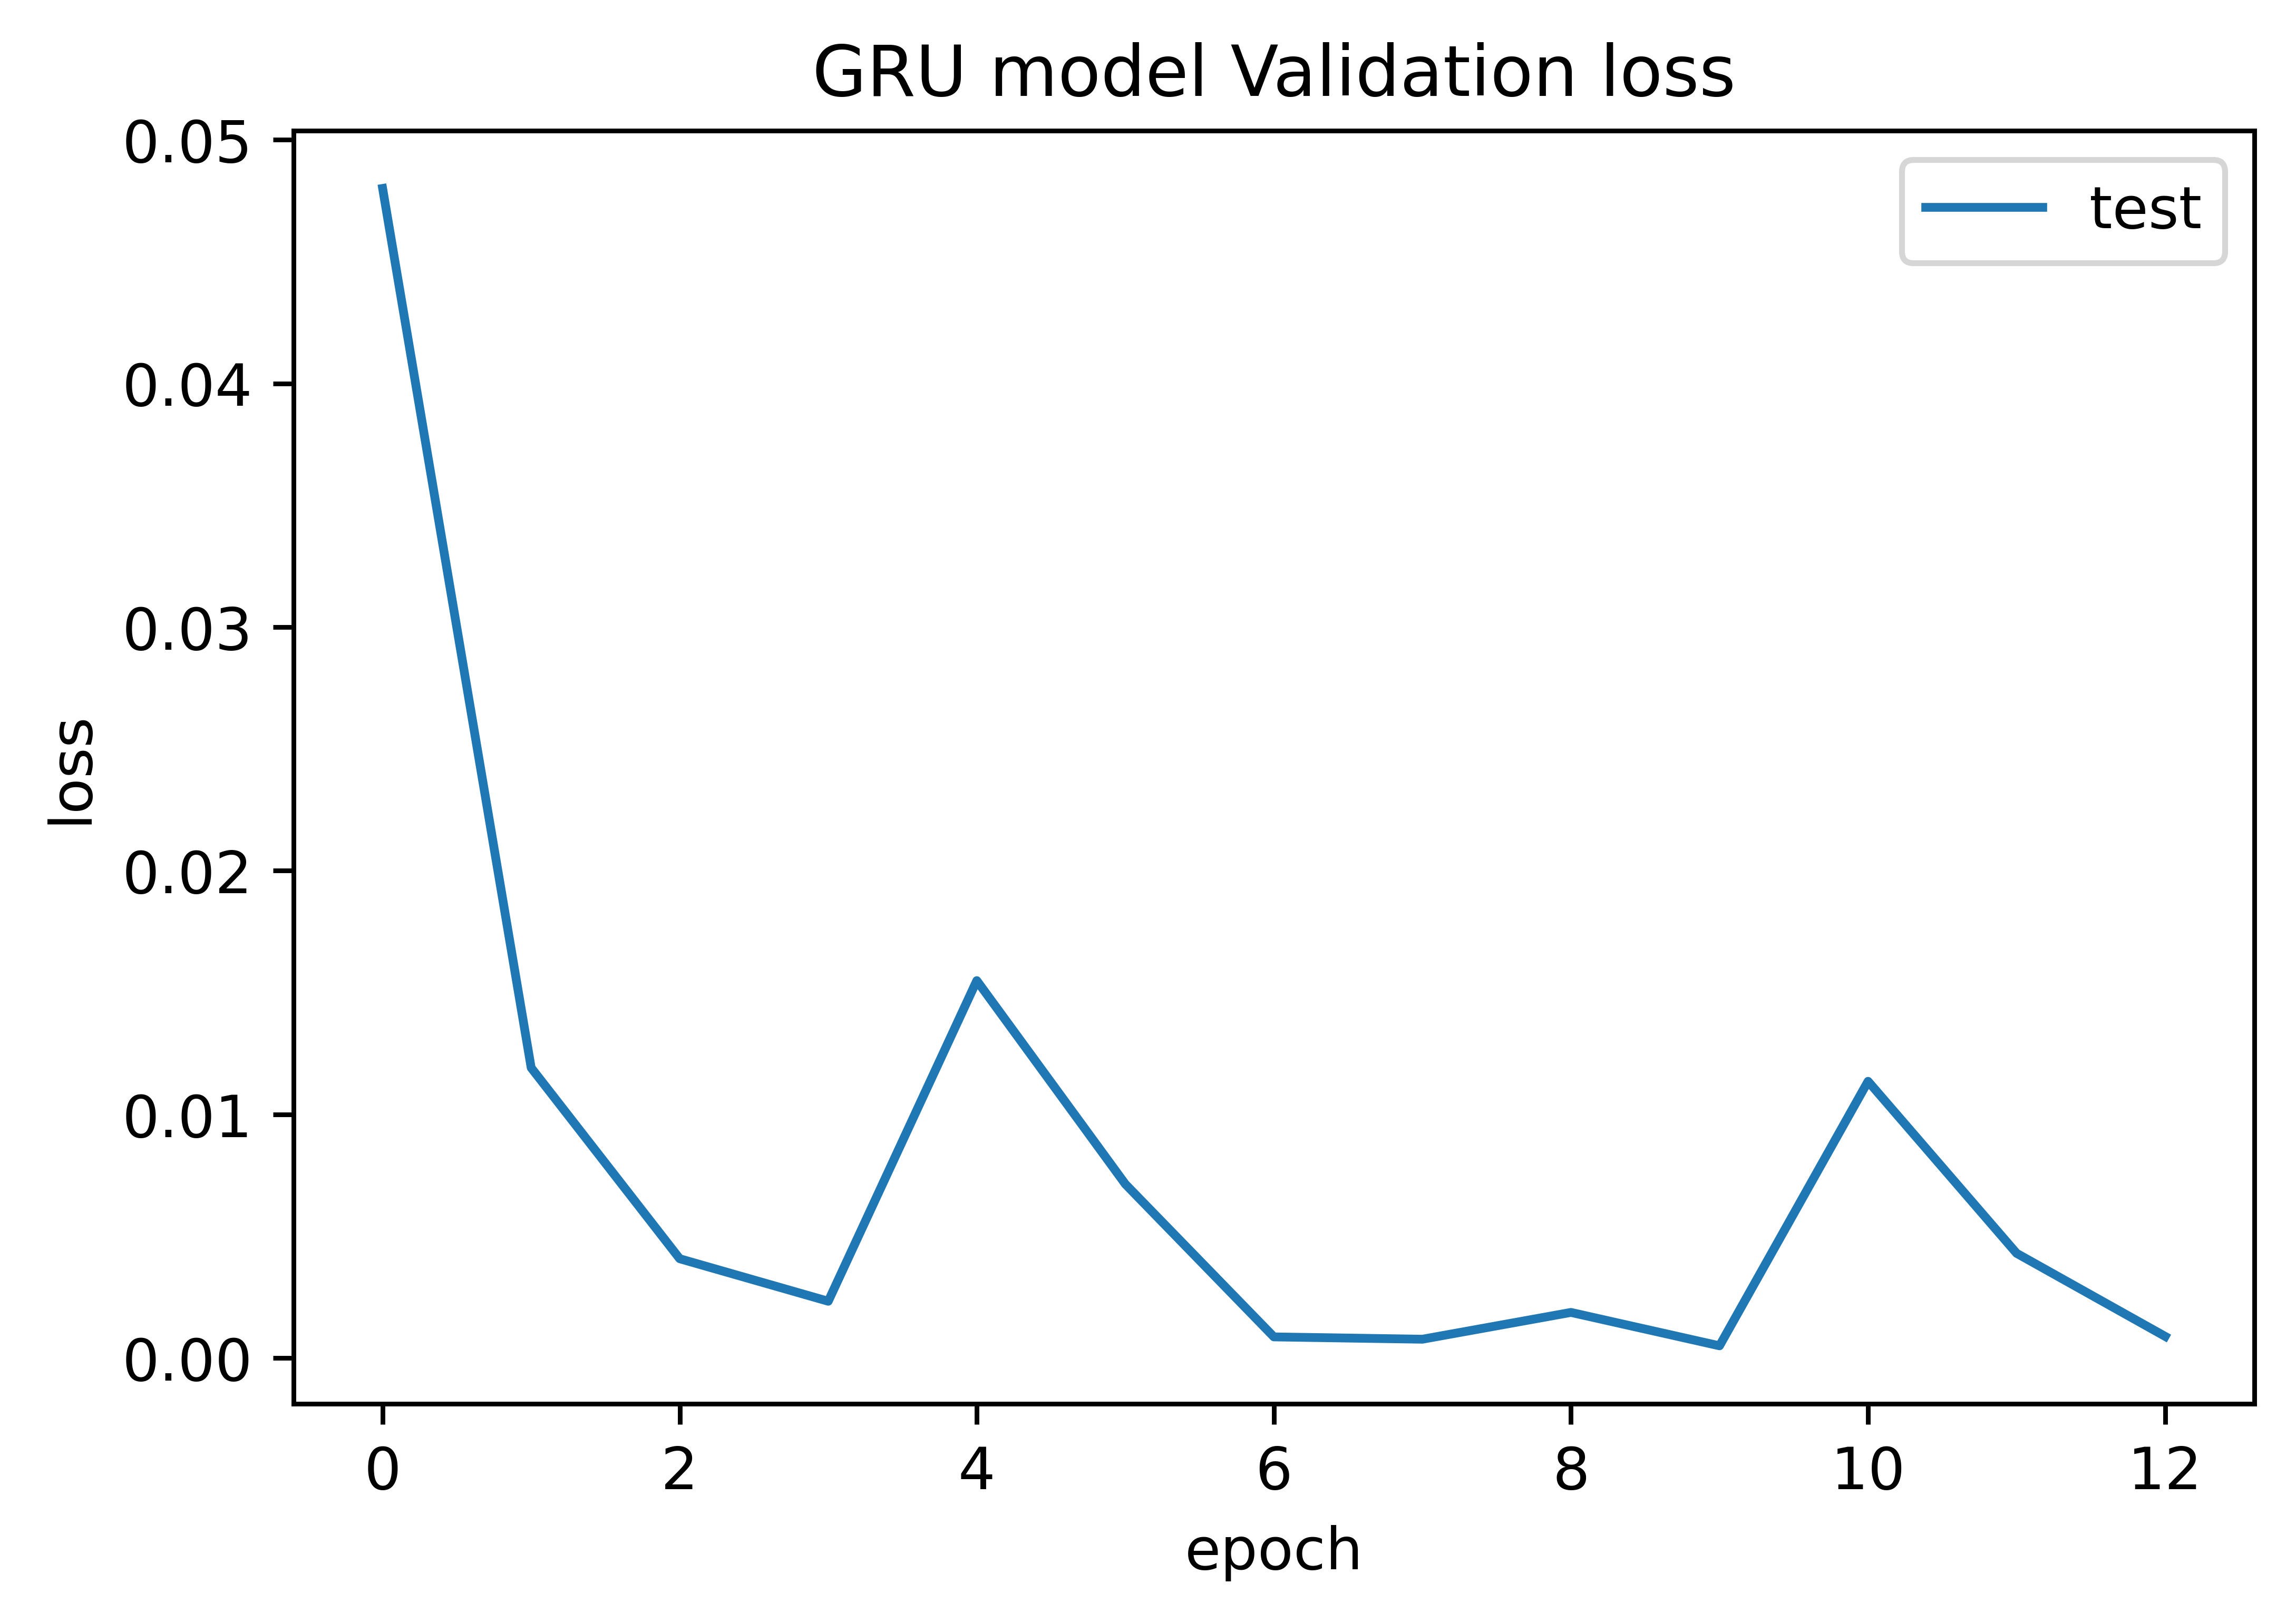

In [ ]:
plt.rcParams['figure.dpi'] = 800
plt.plot(history.history['val_loss'])
plt.title('GRU model Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper right')
plt.savefig("GRU_model_val_loss.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
scores = model.evaluate(test_x, test_y)

for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

119/119 [==============================] - 0s 2ms/step - loss: 8.9184e-04 - accuracy: 0.9997

loss: 0.001

accuracy: 1.000


In [ ]:
predict_x=model.predict(test_x)
pred_=np.argmax(predict_x,axis=1)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(test_y[:]), axis = 1)[:,1])

cnt = 0
for i,j in zip(pred_, true_y):
    print("Predicted: {}, True: {}".format(i, j))
    cnt = cnt+1
    if cnt > 100:
        break

Predicted: 3, True: 3
Predicted: 5, True: 5
Predicted: 0, True: 0
Predicted: 0, True: 0
Predicted: 2, True: 2
Predicted: 4, True: 4
Predicted: 3, True: 3
Predicted: 6, True: 6
Predicted: 5, True: 5
Predicted: 5, True: 5
Predicted: 0, True: 0
Predicted: 3, True: 3
Predicted: 3, True: 3
Predicted: 7, True: 7
Predicted: 5, True: 5
Predicted: 0, True: 0
Predicted: 1, True: 1
Predicted: 2, True: 2
Predicted: 3, True: 3
Predicted: 0, True: 0
Predicted: 5, True: 5
Predicted: 1, True: 1
Predicted: 6, True: 6
Predicted: 5, True: 5
Predicted: 7, True: 7
Predicted: 2, True: 2
Predicted: 3, True: 3
Predicted: 1, True: 1
Predicted: 3, True: 3
Predicted: 3, True: 3
Predicted: 3, True: 3
Predicted: 1, True: 1
Predicted: 1, True: 1
Predicted: 6, True: 6
Predicted: 5, True: 5
Predicted: 4, True: 4
Predicted: 6, True: 6
Predicted: 3, True: 3
Predicted: 3, True: 3
Predicted: 5, True: 5
Predicted: 1, True: 1
Predicted: 7, True: 7
Predicted: 4, True: 4
Predicted: 2, True: 2
Predicted: 3, True: 3
Predicted:

In [ ]:
test_y[:20]

array([[0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
test_x[:20]

array([[[-1.38719329],
        [-1.590708  ],
        [-0.3723187 ],
        [ 3.04349576],
        [ 0.67937622],
        [-0.48130115],
        [-1.22296476],
        [-1.01829193],
        [-1.10495449],
        [ 1.89896407],
        [ 1.89896407]],

       [[ 0.43705199],
        [ 1.18696724],
        [ 1.12866581],
        [ 1.10882516],
        [-1.6157119 ],
        [-0.75593268],
        [ 0.98577036],
        [ 1.51569401],
        [-0.87946329],
        [ 0.89772242],
        [ 0.89772242]],

       [[-1.45676196],
        [-1.69509058],
        [-1.20874519],
        [-1.0661772 ],
        [ 0.09775863],
        [-0.60717393],
        [-1.28411138],
        [-1.05615971],
        [-0.66377605],
        [ 1.46092085],
        [ 1.46092085]],

       [[-1.0818641 ],
        [-1.43028847],
        [-0.93375566],
        [-0.53744734],
        [ 0.49945135],
        [-0.5705564 ],
        [-1.28858552],
        [-1.02460322],
        [-0.80103157],
        [ 1.21061043],
     

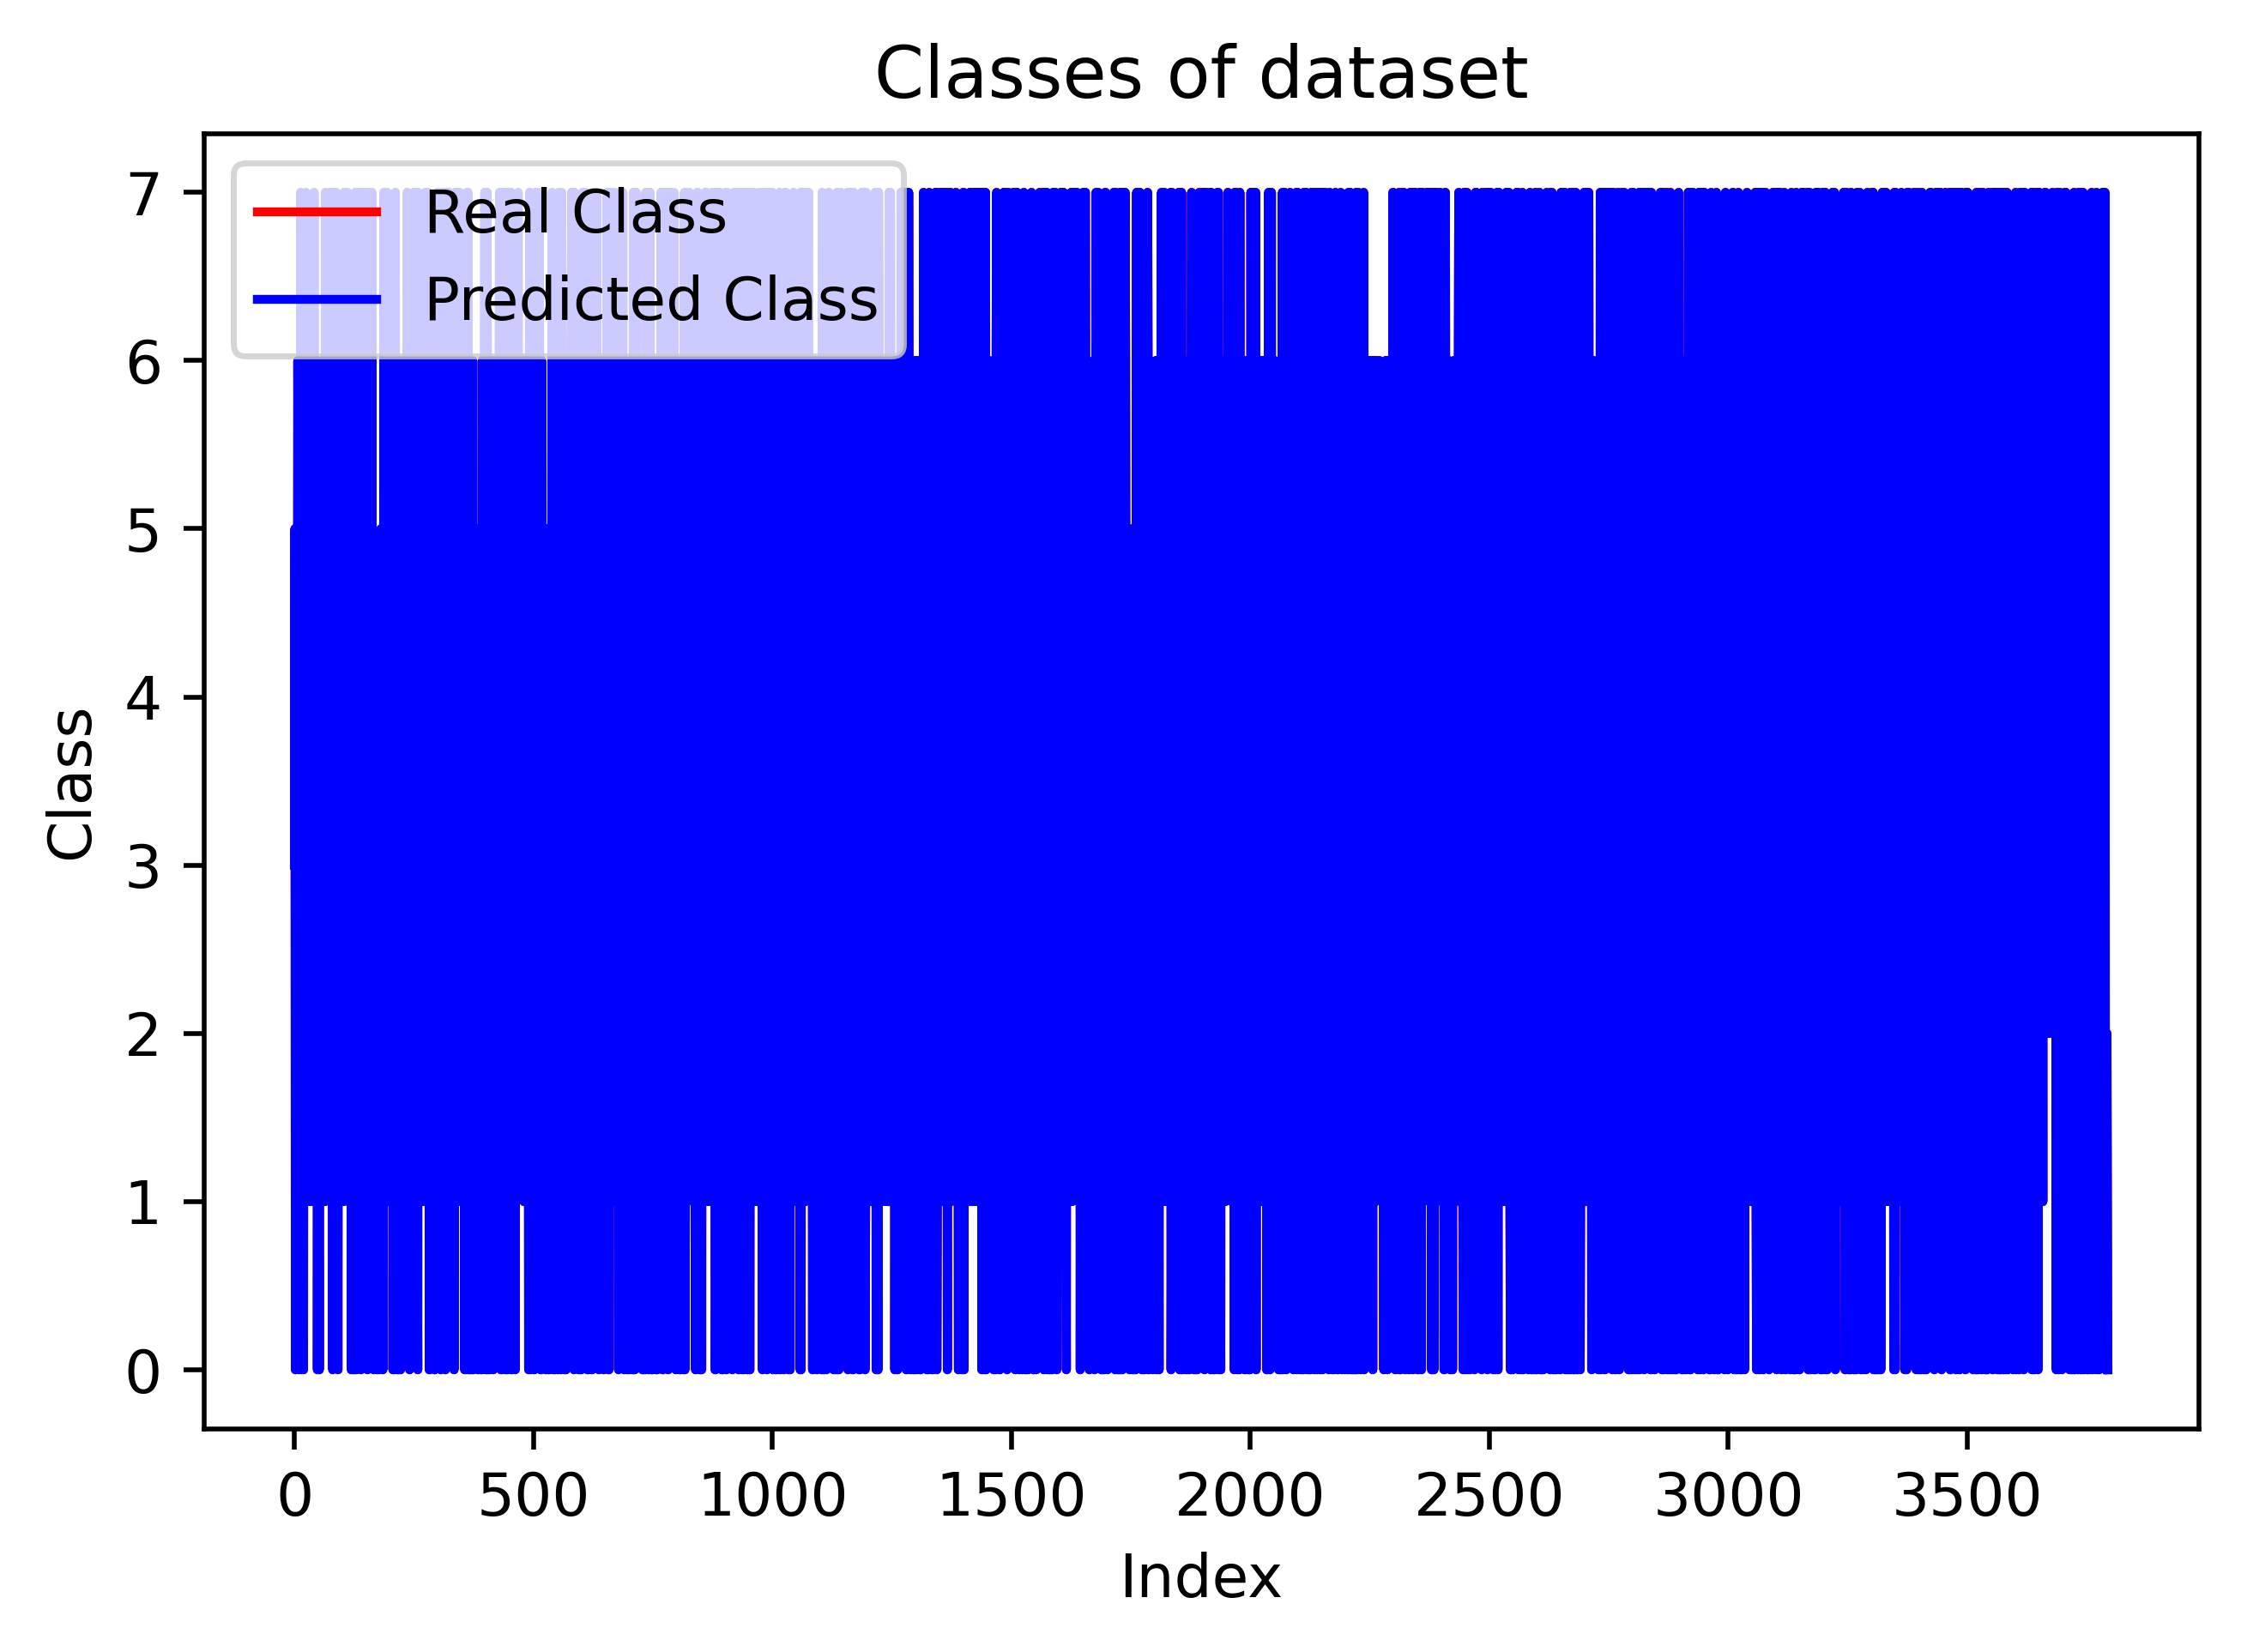

In [ ]:
plt.rcParams['figure.dpi'] = 500
plt.plot(true_y, color = 'red', label = 'Real Class')
plt.plot(pred_, color = 'blue', label = 'Predicted Class')
plt.title('Classes of dataset')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(true_y, pred_))
mse = mean_squared_error(true_y, pred_)
mae = mean_absolute_error(true_y, pred_)
r2 = r2_score(true_y, pred_)
print("TEST RMSE:", rmse)
print("TEST MSE:", mse)
print("TEST MAE:", mae)
print("TEST R2:", r2)

TEST RMSE: 0.01623282511858913
TEST MSE: 0.00026350461133069827
TEST MAE: 0.00026350461133069827
TEST R2: 0.9999506271227084


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
cm = confusion_matrix(true_y, pred_,normalize='pred')
print(cm)

[[1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.99768519
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.00231481
  1.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]]


In [ ]:
cm_num = confusion_matrix(true_y, pred_)
print(cm_num)

[[508   0   0   0   0   0   0   0]
 [  0 500   0   0   0   0   0   0]
 [  0   0 444   0   0   0   0   0]
 [  0   0   0 519   0   0   0   0]
 [  0   0   0   0 462   0   0   0]
 [  0   0   0   0   0 431   0   0]
 [  0   0   0   0   0   1 448   0]
 [  0   0   0   0   0   0   0 482]]


In [ ]:
import seaborn as sns

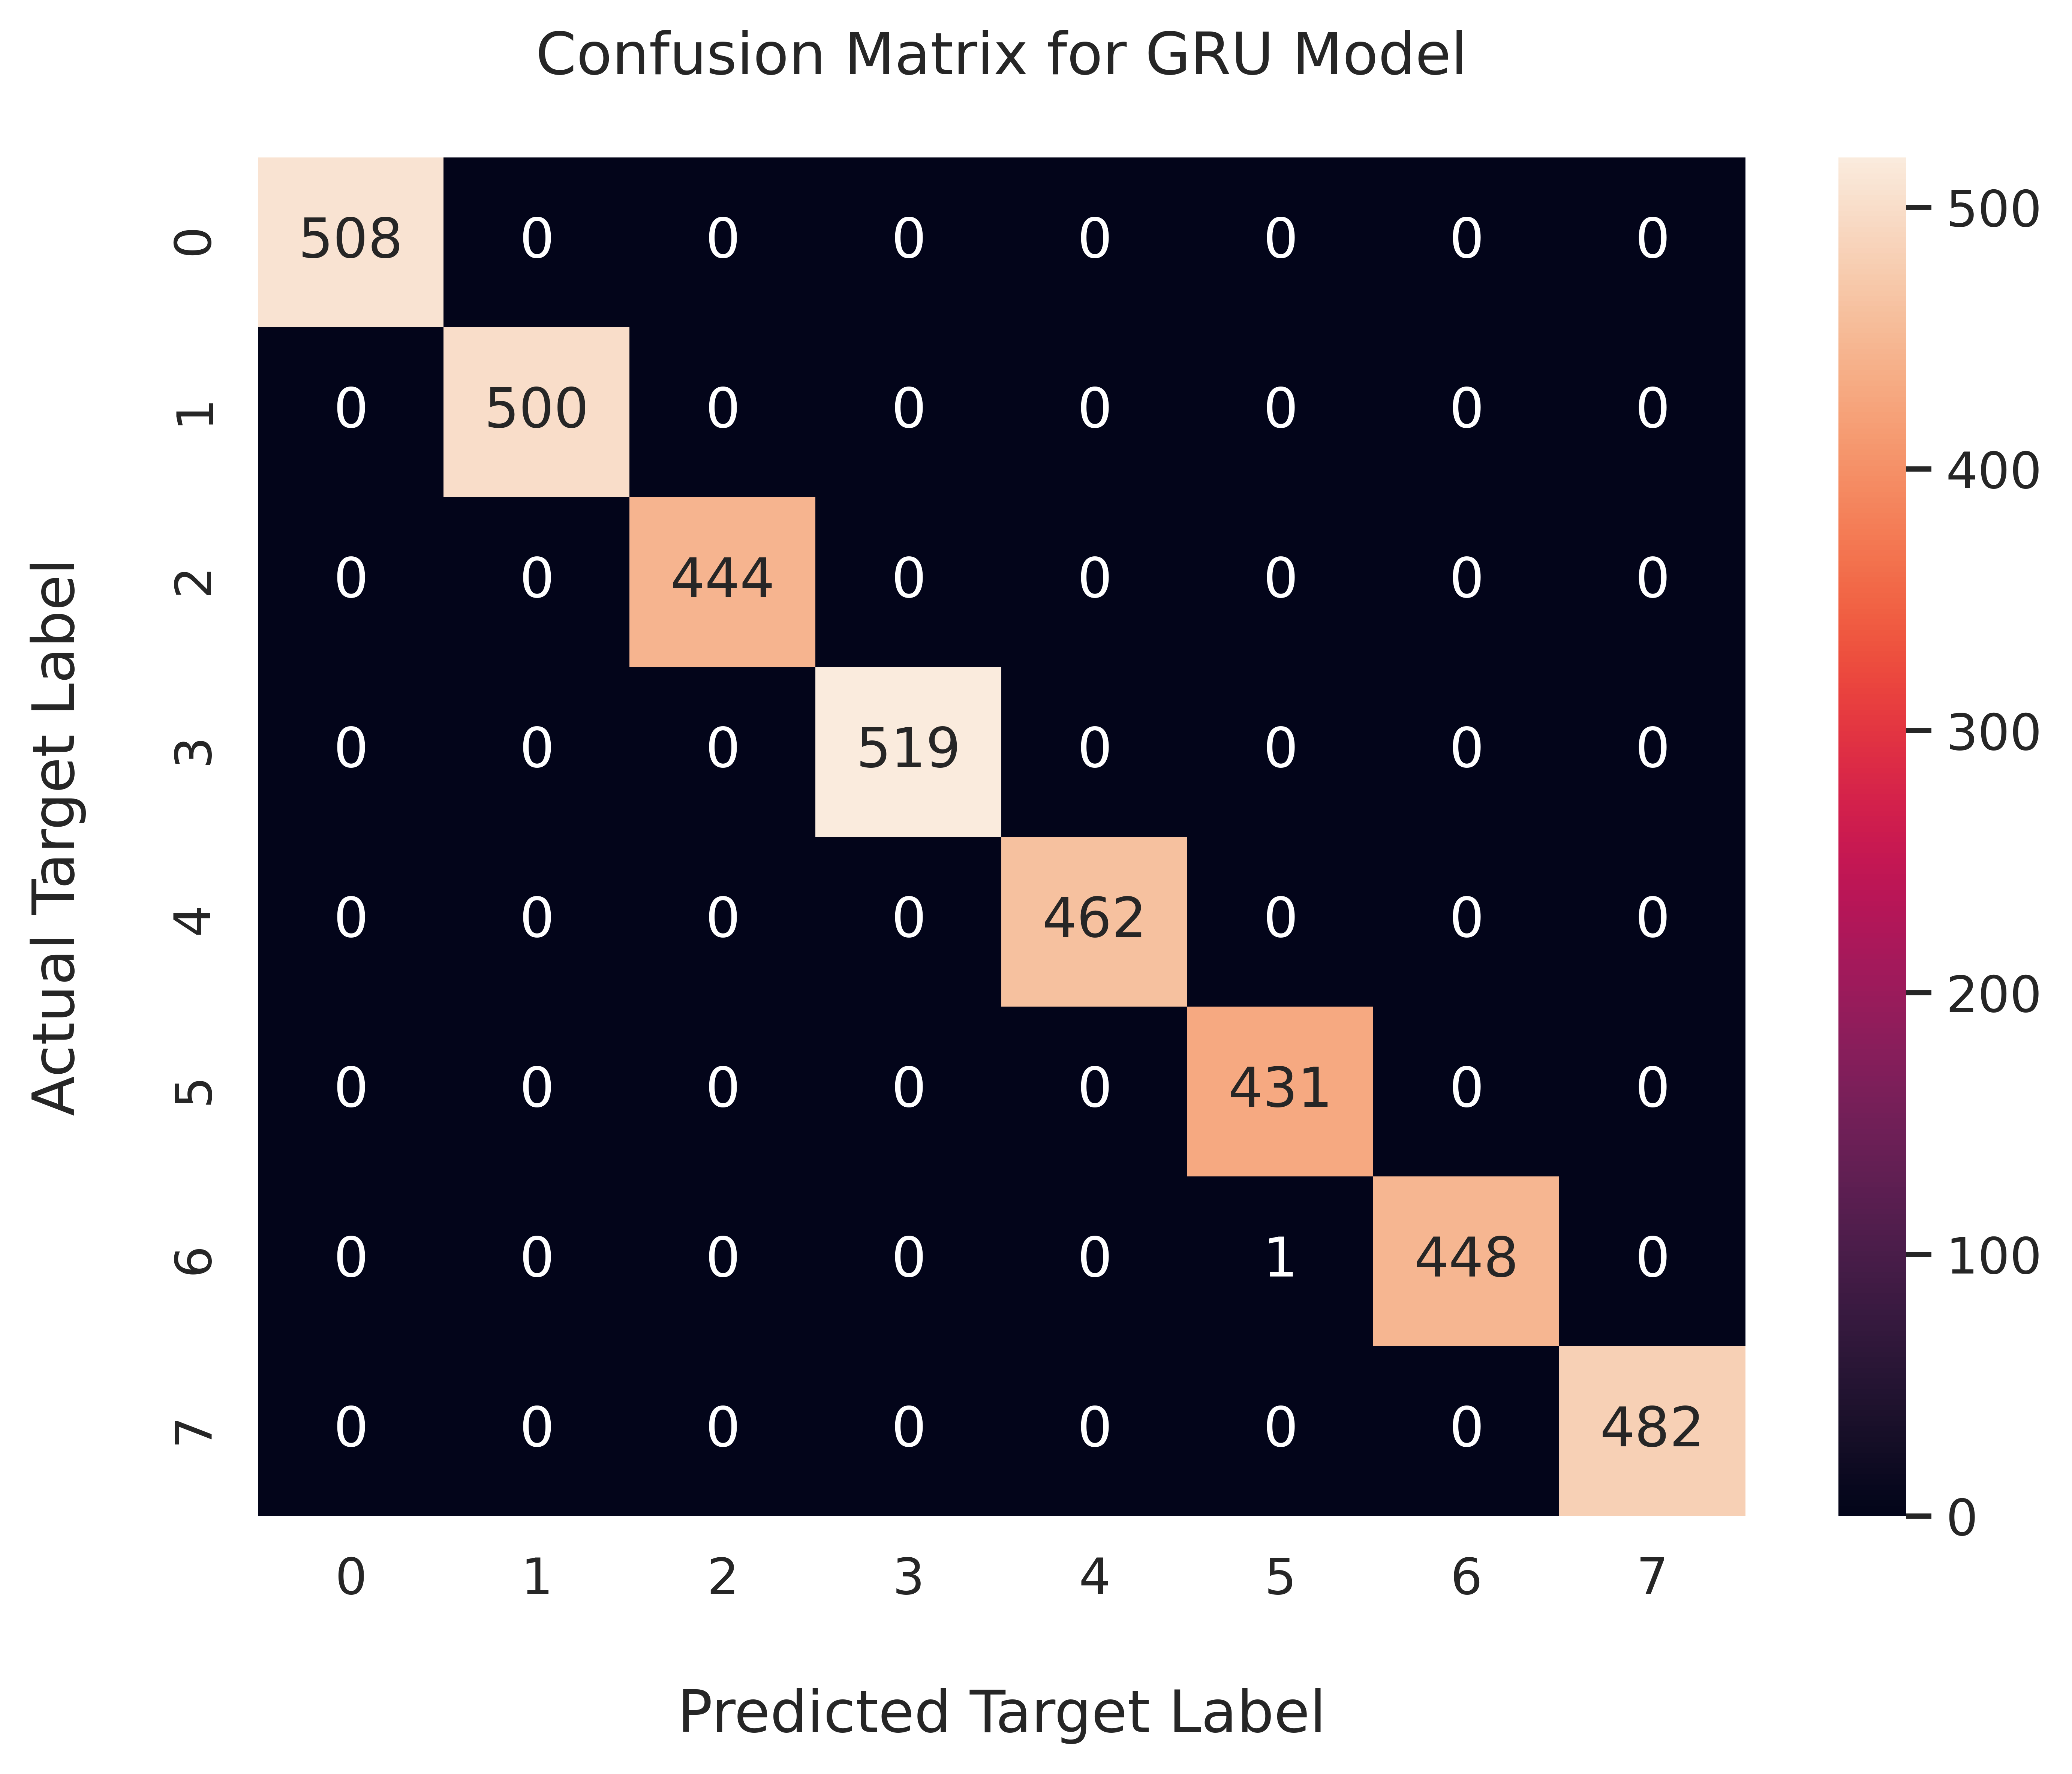

In [ ]:
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=800)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Target labels
labels = ['0', '1', '2', '3', '4', '5', '6', '7']
# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers.
ax = sns.heatmap(cm_num, annot=True, fmt='d', )

# set x-axis label and ticks.
ax.set_xlabel("Predicted Target Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(labels)

# set y-axis label and ticks
ax.set_ylabel("Actual Target Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(labels)

# set plot title
ax.set_title("Confusion Matrix for GRU Model", fontsize=14, pad=20)

plt.savefig("CM_GRU.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(true_y, pred_)

print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       444
           3       1.00      1.00      1.00       519
           4       1.00      1.00      1.00       462
           5       1.00      1.00      1.00       431
           6       1.00      1.00      1.00       449
           7       1.00      1.00      1.00       482

    accuracy                           1.00      3795
   macro avg       1.00      1.00      1.00      3795
weighted avg       1.00      1.00      1.00      3795

